# **Resolución Laboratorio #3**
**Implementación del Algoritmo de Regresión Logística**

**Integrantes:**

1) Francisco Javier González Alfaro GA101522

2) Francisco López Guardado LG100422

3) David Gilberto Castellanos CC202822

In [ ]:
# Importamos la librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Importamos la data sobre enfermedades cardíacas
df = pd.read_csv("https://raw.githubusercontent.com/dgca77/DataSet/main/Heart.csv")
df

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [ ]:
# Renombramos los datos de forma categorica de la columna AHD
df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes
df

,Id,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,1


In [ ]:
# Asignamos todas las columnas a excepcion de la columna AHD a la variable X, que es nuestra variable independiente:
X = df.iloc[:, [1,2]].values

In [ ]:
# Asignamos la columna AHD a nuestra variable dependiente
y = df.iloc[:,14].values

In [ ]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
# Escalamos los datos para obtener un mejor resultado
escalar = StandardScaler()
X_train_escalar = escalar.fit_transform(X_train)
X_Test_escalar = escalar.transform(X_test)

In [ ]:
X_train_escalar

array([[ 0.839319  ,  0.66496381],
       [ 0.51697185,  0.66496381],
       [ 0.73186995,  0.66496381],
       [ 0.73186995, -1.50384124],
       [-0.34262056,  0.66496381],
       [-0.77241676,  0.66496381],
       [ 0.1946247 ,  0.66496381],
       [-0.34262056,  0.66496381],
       [ 0.30207375, -1.50384124],
       [ 1.0542171 ,  0.66496381],
       [ 0.6244209 ,  0.66496381],
       [-0.02027341, -1.50384124],
       [-0.66496771, -1.50384124],
       [-0.98731486,  0.66496381],
       [-1.20221297,  0.66496381],
       [-1.30966202,  0.66496381],
       [-0.45006961,  0.66496381],
       [ 1.37656426,  0.66496381],
       [ 0.4095228 ,  0.66496381],
       [ 0.839319  ,  0.66496381],
       [ 0.839319  , -1.50384124],
       [ 1.37656426,  0.66496381],
       [ 0.51697185,  0.66496381],
       [ 0.6244209 ,  0.66496381],
       [-0.23517151,  0.66496381],
       [ 0.51697185,  0.66496381],
       [ 1.48401331,  0.66496381],
       [ 1.69891141,  0.66496381],
       [-1.84690727,

In [ ]:
# Ajustamos nuestros datos de entrenamiento escalados
log_reg = LogisticRegression(random_state = 0).fit(X_train_escalar, y_train)

# Ahora de predice sobre los datos escalados
y_pred = log_reg.predict(X_Test_escalar)

In [ ]:
# Verificamos nuestro modelo con la matriz de confusion
conf = confusion_matrix(y_test, y_pred)
conf

array([[37, 10],
       [14, 30]])

<ipython-input-129-a6e6c46fbe13>:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


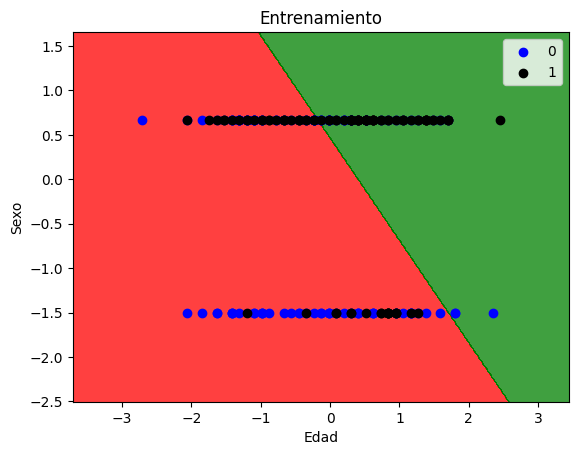

In [ ]:
# Generar una cuadrícula de puntos para evaluar el modelo
X_set, y_set = X_train_escalar, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
              c = ListedColormap(('blue','black'))(i), label = j)
  
plt.title('Entrenamiento')
plt.xlabel('Edad')
plt.ylabel('Sexo')
plt.legend()
plt.show()

**Interpretacion de los datos**

Como los datos estan escalados, se puede decir que las personas de menor edad, que representan en el eje de las X los números negativos -3, -2, -1, inlcuso se puede tomar el 0, luego de 1 en adelante se refiere a las personas de mayor edad.
Por el lado del eje Y, como solo tenemos el dato del sexo, podemos decir que el valor 0 es femenino y 1 es masculino, pero como nuestro datos estan escalados se encuentran  en -1.5 y 1.5, el primero representa al sexo femenino y el segundo al masculino.
Ademas se puede observar que las bolitas azules representan a aquellas personas que no tienen una enfermedad cardiaca y las bolitas negras representan a las que si tienen una.

Por lo que podemos deducir de este grafico que existen mas hombres de edad media en adelante con enfermedades cardiacas, que las mujeres, ya que se puede observar que hay mas bolitas azules, es decir muejeres con menos enfermedades cardiacas.

Este algoritmo sirve mucho para predecir entre dos posibles decisiones, si es blanco o negro, si tiene una enfermedad o no, si el mail recibido es spam o no, es decir que basicamente es un metodo estadistico para predecir clases binarias. 